# K Nearest Neighbors

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Task 1: Iris Dataset

### Load Dataset

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
# explore what is in variable iris

In [2]:
df = pd.read_csv('test.csv')

In [3]:
df = pd.get_dummies(df, columns=["type"])
features = ['feature1','feature2','feature3','feature4','feature5','feature6','feature7','feature8','feature9',
            'feature10','feature11','type_new']
X=df[features]
X.fillna(X.mean(),inplace = True)

/Users/parth/Anaconda/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [3]:
X_iris = iris.data
y_iris = iris.target

### Split dataset into train and test

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=.5)


In [11]:
len(X_train)

75

### Define KNN Algorithm

In [79]:
# Calculate euclidean distance between x1 and x2. You can assume both x1 and x2 are numpy arrays
def distance(x1, x2):
    c=0
    for i in range(len(x1)):
        c = c + (x1[i]-x2[i])**2
    return c**0.5

# Implement knn algorithm. Return majority label for given test_sample and k
def knn(X_train, y_train, test_sample, k):
    arr = []
    for i in range(len(X_train)):
        arr.append((distance(X_train[i],test_sample),y_train[i]))
    arr.sort()
    freq = [0,0,0]
    for i in range(k):
        freq[arr[i][1]] = freq[arr[i][1]] + 1
    return freq.index(max(freq))
# Return class of each test sample predicted by knn 
def predict(X_train, y_train, X_test, k):
    a = []
    for i in range(len(X_test)):
        a.append(knn(X_train,y_train,X_test[i],k))
    return a

### Get results for k=3

In [54]:
y_pred = predict(X_train,y_train,X_test,3)

In [55]:
w=0
for i in range(len(y_pred)):
    if(y_pred[i]!=y_test[i]):
        w=w+1
w

1

### Evaluate results

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(y_test,y_pred)) # accuracy_score
print(confusion_matrix(y_test,y_pred)) # confusion_matrix
print(classification_report(y_test,y_pred)) # classification_report

0.9866666666666667
[[27  0  0]
 [ 0 22  0]
 [ 0  1 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.96      1.00      0.98        22
           2       1.00      0.96      0.98        26

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



### Hyperparameter Tuning

In [57]:
for k in range(2,10):
    print(k,':',accuracy_score(y_test,predict(X_train,y_train,X_test,k))) # predict for different k values and calculate accuracy_score

2 : 0.9733333333333334
3 : 0.9866666666666667
4 : 0.9866666666666667
5 : 1.0
6 : 0.9733333333333334
7 : 0.9866666666666667
8 : 0.9733333333333334
9 : 1.0


## Task 2 : MNIST

### Load Dataset

In [58]:
mnist = pd.read_csv('mnist.csv') # from mnist.csv
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
dataset = mnist.drop('label',axis=1)
dval = mnist['label']

In [91]:
max(dval)

9

In [92]:
# Choose less than 5000 samples during the lab otherwise it'll take too much time to calculate distances
X_mnist = dataset[1:101]
y_mnist = dval[1:101]

### Visualize the data

6


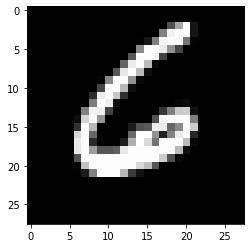

In [93]:
plt.imshow(X_mnist.iloc[90].values.reshape((28, 28)), cmap='gray')
print(y_mnist.iloc[90])

### Split dataset into train and test

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist, test_size=.5)


### Modify KNN algorithm to include hyperparameter tuning

(So that we can avoid calculating distance every time we change k)

In [95]:
# Parameter k is now a list of values

# Distance function remains same

# For each k in k_values return majority label
def knn_batch_k(X_train, y_train, test_sample, k_values):
    arr = []
    for i in range(len(X_train)):
        arr.append((distance(X_train[i],test_sample),y_train[i]))
    arr.sort()
    ans = []
    for i in range(len(k_values)):
        freq = [0,0,0,0,0,0,0,0,0,0]
        for j in range(k_values[i]):
            freq[arr[j][1]] = freq[arr[j][1]] + 1
        ans.append(freq.index(max(freq)))
    return ans
# Return class of each test sample predicted by knn for each k in k_values
def predict_batch_k(X_train, y_train, X_test, k_values=np.arange(2,10)):
    fans = []
    for i in range(len(X_test)):
        fans.append(knn_batch_k(X_train, y_train, X_test[i], k_values))
    return fans

### Get results for k=[2,3,4,5,6,7,8,9]

In [96]:
k_values = np.arange(2,10)
y_pred = predict_batch_k(X_train.values, y_train.values, X_test.values, k_values=np.arange(2,10))

### Evaluate results

In [97]:
# Change this code according to your output format

In [98]:
y_pred = np.asarray(y_pred)
y_pred = y_pred.T
y_pred

array([[1, 9, 7, 7, 4, 3, 3, 4, 6, 0, 1, 1, 4, 3, 4, 3, 6, 1, 9, 0, 1, 1,
        2, 3, 2, 1, 1, 1, 1, 0, 1, 3, 2, 4, 4, 7, 4, 3, 2, 9, 0, 1, 1, 2,
        7, 2, 0, 2, 9, 3],
       [1, 9, 9, 7, 4, 3, 3, 9, 6, 0, 1, 1, 4, 3, 4, 2, 1, 1, 9, 0, 1, 1,
        2, 3, 2, 1, 1, 1, 1, 0, 1, 2, 1, 4, 4, 7, 9, 1, 2, 9, 0, 1, 1, 4,
        2, 2, 0, 2, 9, 3],
       [1, 9, 9, 7, 4, 3, 1, 9, 6, 0, 1, 1, 4, 3, 4, 2, 1, 1, 9, 0, 1, 1,
        8, 3, 1, 1, 1, 1, 1, 0, 1, 0, 2, 4, 9, 7, 4, 3, 2, 9, 0, 1, 1, 4,
        2, 2, 0, 0, 9, 3],
       [1, 9, 9, 7, 4, 0, 1, 9, 6, 0, 1, 1, 4, 3, 9, 8, 1, 1, 9, 0, 1, 1,
        8, 3, 1, 1, 1, 1, 1, 0, 0, 2, 2, 4, 9, 1, 4, 1, 2, 9, 0, 1, 1, 4,
        9, 0, 0, 2, 9, 3],
       [1, 9, 9, 7, 4, 0, 1, 9, 6, 0, 1, 1, 4, 3, 9, 5, 1, 1, 9, 0, 1, 1,
        7, 3, 1, 1, 1, 1, 1, 0, 7, 0, 2, 4, 9, 1, 4, 1, 2, 9, 3, 1, 1, 4,
        9, 2, 0, 0, 9, 3],
       [1, 9, 9, 7, 4, 0, 1, 9, 6, 0, 1, 1, 4, 3, 9, 3, 1, 1, 9, 0, 1, 1,
        7, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 4, 9, 1, 9

In [99]:
itr = 0
for k in k_values:
    print(k,':',accuracy_score(y_test, y_pred[itr]))
    itr+=1

2 : 0.48
3 : 0.48
4 : 0.48
5 : 0.42
6 : 0.46
7 : 0.44
8 : 0.48
9 : 0.4
